# Atividade 5 - Cálculo Numérico
Carlos Bravo - 119136241

As funções chamadas estão implementadas no arquivo _lib.jl_

Algumas questões foram discutidas com:
* Gabriele Jandres

## Imports

In [1]:
include("../lib.jl");

In [2]:
using Polynomials: Polynomial

In [3]:
using Plots

In [4]:
using Printf: @printf

In [5]:
gr()
theme(:dark)

## Exercício 1

Para pode fazer a regressão não-linear, usaremos a mesma estratégia usada na lista anterior:
$$T = c_0x^{c_1}$$
$$ln(T) = ln(c_0) + c_1ln(x)$$

"Dicionário":
* $T\_exp = ln(T)$
* $c0\_exp = ln(c0)$
* $c1\_exp = c_1$
* $x\_exp = ln(x)$

In [6]:
x = [0.1, 0.2, 0.4, 0.8, 0.9]
T = [22, 43, 84, 210, 320];

In [7]:
# Converte pelo dicionario e transforma em uma reta
x_exp = log.(x)
T_exp = log.(T)
c_exp = interpolation(x_exp, T_exp, 1);

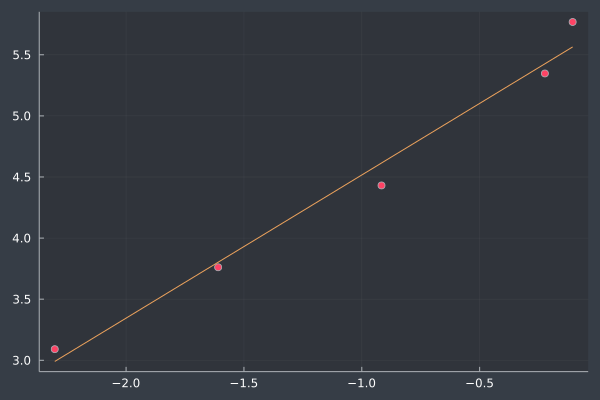

In [8]:
scatter(x_exp, T_exp, leg=false)
plot!(Polynomial(c_exp), extrema(x_exp)...)

Agora que temos a interpolação após a transformação, podemos retornar à função original

In [9]:
c = [exp(c_exp[1]), c_exp[2]]
Tf(x) = c[1]x^c[2]
@printf("%.3f\n",Tf(0.3))

72.061


A temperatura em $0.3cm$ com 3 casas decimais é $72.061°C$.

As células a seguir serão usadas na questão 5:

In [10]:
erroQ1 = mse(Tf.(x), T)
coeffQ1 = c
;

## Exercício 2

### 1. Encontre a altura

Para estimar a altura podemos integrar a função velocidade, pois isso nos dará a distância percorrida. Vamos considerar um trapézio entre cada par de pontos e somar suas áreas:

In [11]:
time = [0, 10, 15, 20, 32, 59, 62, 125]
velocity = [0, 185, 319, 447, 742, 1325, 1445, 4151]
n = length(time)
;

In [12]:
# Calcula a area do trapezio que sera formado entre os pontos a & b
function trapezoid_area(a, b, fa, fb)
    return (b-a)*(fa+fb)/2
end
;

In [13]:
S = 0
for i = 1:n-1
    S += trapezoid_area(time[i], time[i+1], velocity[i], velocity[i+1])
end
S

219567.5

Então a altura alcançada pela nave foi de $219567.5$ pés. Convertendo para medidas de verdade, $66924.174m \approx 66.9km$  

### 2. Erro máximo

Para conseguir estimar o erro máximo é necessário saber a segunda derivada da função que estamos integrando. Neste caso, precisamos saber qual o arranque do ônibus espacial.

Conseguindo limitar seu arranque superiormente, é possível usar esse mesmo teto para estimar o erro

### 3. Estime a altura com uma reta

Aproximando uma função podemos usar o método dos trapézios em vários pontos equidistantes. Para isso vai ser necessário criar uma função diferente para o método do trapézio.

Como nesse caso específico é uma reta, não precisamos de vários trapézios, podemos usar um único:

In [14]:
P1 = Polynomial(interpolation(time, velocity, 1))

Polynomial(-232.97096383346047 + 32.438909320952575*x)

In [15]:
integral_trapezoid(P1, 0, 125, 1)

224307.60859075945

Usando o método dos trapézios em uma reta encontrada por Regressão, a altura alcançada pela nave é de $224307.6085907594$ pés, ou, $68368.959098463470582m \approx 68.3km$

## Exercício 3

### 1. Aproximação da área

Podemos aproximar a área do círculo no primeiro quadrante calculando a integral da função $y=\sqrt{1-x^2}$, no intervalo $[0,1]$. Sabemos também que:
$$h = \frac{b-a}{n}$$
$$n = \frac{b-a}{h}$$
Como queremos que $h = 0.1$, temos que $n = 10$

In [16]:
y(x) = sqrt(1 - x^2)
area_q1 = integral_trapezoid(y, 0, 1, 10)

0.7761295823071377

Esse valor é a área do primeiro quadrante. Para a área do círculo inteiro precisamos multiplicar esse valor por $4$.

In [17]:
area_q1 * 4

3.1045183292285508

Assim, temos que a área do círculo é aproximadamente $3.1045183292285508$. Esse número também é uma aproximação de $\pi$

### 2. Erro ao estimar o erro

Não podemos estimar o erro com a fórmula pois para isso é necessário uma segunda derivada limitada no intervalo. A segunda derivada da função $\sqrt{1 - x^2}$ é $1/(1-x^2)^{3/2}$.

Seu menor valor no intervalo $[0,1]$ é quando $x=0$, com seu valor sendo $1$.

Mas seu maior valor é quando $x\rightarrow 1$. Nesse caso o denominador está tendendo a 0, logo, seu valor está tendendo a infinito. Como não é possível limitar superiormente a segunda derivada da função, não podemos estimar seu erro com aquela fórmula

## Exercício 4

O método criado em aula calcula a integral para cada $y$ e para cada $x$. Agora $x$ está variando entre $h(y)$ e $g(y)$, então basta mudar os limites para esses valores:

In [18]:
f(x, y) = x^2 * y
a = 0
b = 1
h(y) = y^2
g(y) = y
double_integral_trapezoid(f, a, b, h, g)

0.024999917261990877

## Exercício 5

Quando fizemos a questão 1, minimizamos o erro nesse mundo linear que chegamos, mas é possível minimizar o erro original da função, usando Gradiente Descendente. O erro é:
$$\sum_{i=1}^N{(y_i - c_0x_i^{c_1})^2}$$
Seu gradiente será:
$$\sum_{i=1}^N{-2x_i^{c_1}(y_i-c_0x_i^{c_1})(1, c_0x_i^{c_1}ln(x_i))}$$

In [19]:
function gradient(x, y, c0, c1)
    n = length(x)
    ∇c0 = 0
    ∇c1 = 0
    for i = 1:n
        coeff = -2x[i]^c1 * (y[i]-c0*x[i]^c1)
        ∇c0 += coeff
        ∇c1 += coeff * c0*x[i]^c1 * log(x[i])
    end
    return (∇c0, ∇c1)
end
;

Agora que temos a função gradiente, precisamos definir a taxa de aprendizado (O quanto será percorrido nessa direção) e a quantidade de épocas (O número de passos nessa direção).

Além disso, precisamos começar em algum lugar. Para fugir de mínimos locais, vamos começar com um valor que sabemos estar próximo do correto, os valores da questão 1:

In [20]:
coeffQ1

2-element Vector{Float64}:
 295.232768178912
   1.1713294485597148

In [21]:
function gradient_descent(gradient, x, y, α = 1e-5, epochs = 1e5)
    c0, c1 = 295.23, 1.17
    for i=1:epochs
        grad = gradient(x, y, c0, c1)
        c0 -= α * grad[1]
        c1 -= α * grad[2]
    end
    return c0, c1
end
;

In [26]:
x = [0.1, 0.2, 0.4, 0.8, 0.9]
T = [22, 43, 84, 210, 320]

possible_α = [1e-3, 1e-4, 1e-5, 1e-6]
possible_epochs = [1e3, 1e4, 1e5, 1e6]

best_α = 0
best_epochs = 0
best_coeff = 0
best_mse = -1

for α in possible_α
    for epochs in possible_epochs
        c0, c1 = gradient_descent(gradient, x, T, α, epochs)
        Tf(x) = c0 * x^c1
        error = mse(Tf.(x), T)
        if(best_mse == -1) best_mse = error end
        if(error <= best_mse)
            best_α = α
            best_epochs = epochs
            best_mse = error
            best_coeff = [c0, c1]
        end
    end
end
best_α, best_epochs, best_mse, best_coeff

(0.0001, 10000.0, 48.94548005985822, [334.08385524675697, 1.5362547311864048])

Sabemos então que nosso melhor resultado obteve um erro de $48.94548005985822$, com taxa de aprendizado de $1e-4$, $1e4$ épocas e com coeficientes $334.08385524675697$ e $1.5362547311864048$. Vamos ver o gráfico desse resultado:

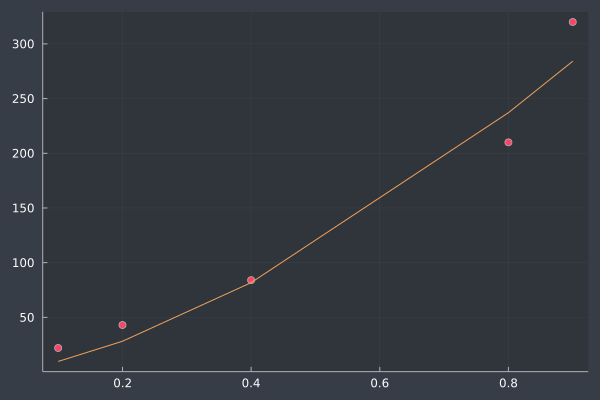

In [27]:
Tf(x) = best_coeff[1] * x^best_coeff[2]
scatter(x, T, leg=false)
plot!(x, Tf.(x))

Comparando com a questão 1, o erro tinha sido de:

In [31]:
println(erroQ1)
1 - best_mse / erroQ1

63.88227679458349


0.23381753882622647

Podemos ver que o resultado com gradiente descente já proporcionou uma melhora no resultado, com uma melhora de $23\%$ no erro.